# AdaBoost Implementation in Python

## AdaBoost Definition

### What is AdaBoost?

**AdaBoost**, short for Adaptive Boosting, is a machine learning algorithm that combines multiple weak classifiers to form a strong classifier. A weak classifier is one that performs slightly better than random guessing, while a strong classifier is one that performs very well. AdaBoost is particularly good at improving the performance of these weak classifiers.

### How does AdaBoost work?

1. **Initialize Weights**: Each training example is assigned a weight. Initially, all weights are set equally.
2. **Train Weak Classifier**: A weak classifier is trained using the weighted training data.
3. **Compute Weak Classifier Error**: The error of the weak classifier is calculated based on the weights of the misclassified examples.
4. **Update Weights**: The weights of the misclassified examples are increased, while the weights of correctly classified examples are decreased. This way, the algorithm focuses more on the difficult examples in subsequent iterations.
5. **Combine Weak Classifiers**: The weak classifiers are combined to form a strong classifier. Each weak classifier is assigned a weight based on its accuracy.

### Step-by-Step Python Implementation

We'll use the `scikit-learn` library in Python to implement AdaBoost. `scikit-learn` provides a convenient way to use AdaBoost with its `AdaBoostClassifier` class.

1. **Install scikit-learn**: If you haven't installed it yet, you can do so using pip:
   ```bash
   pip install scikit-learn
   ```

2. **Import Libraries**: Start by importing the necessary libraries.
   ```python
   from sklearn.ensemble import AdaBoostClassifier
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.datasets import make_classification
   from sklearn.model_selection import train_test_split
   from sklearn.metrics import accuracy_score
   ```

3. **Create Dataset**: For simplicity, we'll create a synthetic dataset.
   ```python
   # Create synthetic dataset
   X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
   
   # Split the dataset into training and testing sets
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

4. **Train AdaBoost Classifier**: We'll use a decision tree as the weak classifier.
   ```python
   # Initialize the base classifier
   base_clf = DecisionTreeClassifier(max_depth=1)
   
   # Initialize the AdaBoost classifier
   ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=50, learning_rate=1.0, random_state=42)
   
   # Train the AdaBoost classifier
   ada_clf.fit(X_train, y_train)
   ```

5. **Make Predictions**: Use the trained model to make predictions on the test set.
   ```python
   # Make predictions on the test set
   y_pred = ada_clf.predict(X_test)
   
   # Calculate accuracy
   accuracy = accuracy_score(y_test, y_pred)
   print(f'Accuracy: {accuracy * 100:.2f}%')
   ```

### Key Parameters of AdaBoost

- `base_estimator`: The weak classifier used in AdaBoost. Here, we use `DecisionTreeClassifier`.
- `n_estimators`: The number of weak classifiers to train.
- `learning_rate`: Shrinks the contribution of each weak classifier. There is a trade-off between `learning_rate` and `n_estimators`.


### Mathematical Concepts Behind AdaBoost

AdaBoost involves several key mathematical concepts:
1. **Weights**: Weights are assigned to each training example to indicate their importance.
2. **Weak Classifiers**: Each weak classifier focuses on the weighted training data.
3. **Error Calculation**: The error of each weak classifier is calculated.
4. **Alpha Calculation**: Alpha values are calculated to determine the importance of each weak classifier.
5. **Weight Update**: Weights are updated based on the classifier’s performance.
6. **Final Strong Classifier**: The final strong classifier is a weighted sum of the weak classifiers.

### Step-by-Step Explanation

#### 1. Initialize Weights

Each training example is assigned an initial weight $( w_i )$. For $( N )$ training examples, the initial weights are:

$[ w_i = \frac{1}{N} ]$

#### 2. Train Weak Classifier

A weak classifier $( h_t(x) )$ is trained on the weighted training data.

#### 3. Compute Weak Classifier Error

The error $( \epsilon_t )$ of the weak classifier is calculated as:

$[ \epsilon_t = \sum_{i=1}^N w_i \cdot I(y_i \neq h_t(x_i)) ]$

where $( I(\cdot) )$ is the indicator function, which is 1 if $( y_i \neq h_t(x_i) )$ and 0 otherwise.

#### 4. Compute Alpha

Alpha $( \alpha_t )$ is a measure of the importance of the weak classifier:

$[ \alpha_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right) ]$

#### 5. Update Weights

The weights are updated to give more importance to misclassified examples:

$[ w_i \leftarrow w_i \cdot \exp(\alpha_t \cdot I(y_i \neq h_t(x_i))) ]$

The weights are then normalized:

$[ w_i \leftarrow \frac{w_i}{\sum_{j=1}^N w_j} ]$

#### 6. Final Strong Classifier

The final strong classifier $( H(x) )$ is a weighted sum of the weak classifiers:

$[ H(x) = \text{sign} \left( \sum_{t=1}^T \alpha_t h_t(x) \right) ]$

where $( T )$ is the total number of weak classifiers.

### Example with Math

Let's go through a simple example with three training examples and two weak classifiers.

**Training Data:**
- $( (x_1, y_1) = (1, 1) )$
- $( (x_2, y_2) = (2, -1) )$
- $( (x_3, y_3) = (3, 1) )$

**Initialize Weights:**
$[ w_1 = w_2 = w_3 = \frac{1}{3} ]$

**First Weak Classifier $( h_1(x) )$:**
- $( h_1(1) = 1 )$
- $( h_1(2) = 1 )$
- $( h_1(3) = -1 )$

**Error Calculation:**
$[ \epsilon_1 = \frac{1}{3} (w_2 + w_3) = \frac{2}{3} ]$

**Alpha Calculation:**
$[ \alpha_1 = \frac{1}{2} \ln \left( \frac{1 - \epsilon_1}{\epsilon_1} \right) = \frac{1}{2} \ln \left( \frac{1/3}{2/3} \right) = \frac{1}{2} \ln \left( \frac{1}{2} \right) = -\frac{1}{2} \ln(2) ]$

**Update Weights:**
$[ w_1 \leftarrow w_1 \cdot \exp(-\frac{1}{2} \ln(2) \cdot 0) = \frac{1}{3} ]$
$[ w_2 \leftarrow w_2 \cdot \exp(-\frac{1}{2} \ln(2) \cdot 1) = \frac{1}{3} \cdot \frac{1}{\sqrt{2}} = \frac{1}{3\sqrt{2}} ]$
$[ w_3 \leftarrow w_3 \cdot \exp(-\frac{1}{2} \ln(2) \cdot 1) = \frac{1}{3\sqrt{2}} ]$

Normalize:
$[ Z = \frac{1}{3} + \frac{1}{3\sqrt{2}} + \frac{1}{3\sqrt{2}} = \frac{1}{3} + \frac{2}{3\sqrt{2}} ]$
$[ w_1 \leftarrow \frac{w_1}{Z} ]$
$[ w_2 \leftarrow \frac{w_2}{Z} ]$
$[ w_3 \leftarrow \frac{w_3}{Z} ]$


> Repeat this process for subsequent weak classifiers.


### Error vs Alpha Graph

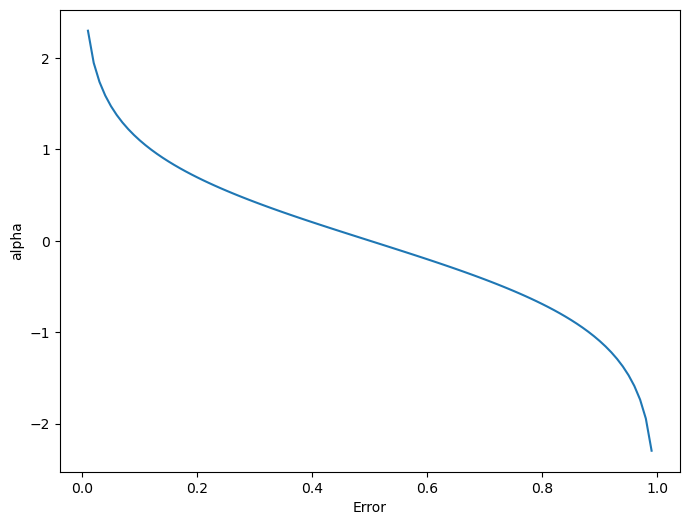

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = lambda x: 0.5 * np.log((1.0-x)/x) 
error = np.arange(0.01, 1.00, 0.01)

plt.figure(figsize=(8,6))
plt.xlabel('Error')
plt.ylabel('alpha')
plt.plot(error, alpha(error))
plt.show()

### Implementing AdaBoost from Scratch

In [3]:
class DecisionStump:
    
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None
    
    def predict(self,X):
        #comparing threshold
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        
        predictions = np.ones(n_samples)
        
        if self.polarity ==1:
            predictions[X_column <self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
            
        return predictions
        

In [5]:
class AdaBoost:
    
    def __init__(self, n_clf=5):#number of classifiers are 5
        self.n_clf = n_clf
        
    def fit(self, X, y):#using for training AdaBoost
        n_samples, n_features = X.shape #retrieving number of samples and featueres from X's hape of training data
        
        #initialising weights
        w = np.full(n_samples, (1/n_samples))#all samples start with equal weight
        
        #empty list of classifiers
        self.clfs = []
        
        # loop running for number of weak classifiers specified by n_clf.
        for _ in range(self.n_clf):
            # Here new weak classifier (DecisionStump) is instantiated.
            #This is a simple classifier that uses a single feature and a threshold to make decisions
            clf = DecisionStump()
            
            min_error = float('inf')#initialised till infinity
            
            for feature_i in range(n_features):#iterating over each feature
                # X_column is the data for the current feature
                X_column = X[:, feature_i]
                # thresholds are the unique values in this column
                thresholds = np.unique(X_column)
                #iterating over all the threshold
                
                for threshold in thresholds:
                    p = 1#polarity
                    # initialising prediction to 1 for each threshold
                    predictions = np.ones(n_samples)
                    # For samples where the feature value is less than the threshold, the prediction is set to -1
                    predictions[X_column< threshold] = -1
                    
                    missclassified = w[y != predictions]#identifying misclassified predictions
                    # calculating error as the sum of their weights
                    error = sum(missclassified)
                    
                    #flipping error
                    if error >0.5:
                        error = 1-error
                        p = -1
                    
                    if error < min_error:
                        min_error = error
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_idx = feature_i
            
            #calculating performance
            EPS = 1e-10
            clf.alpha = 0.5 * np.log((1-error) / (error + EPS))
            
            # Calculating predictions and update weights
            predictions = clf.predict(X)

            w *= np.exp(-clf.alpha * y * predictions)
            # Normalize to one
            w /= np.sum(w)

            # Save classifier
            self.clfs.append(clf)
    
    """
    The predict method is used to make predictions on new data X.
    Each weak classifier makes predictions, weighted by its alpha.
    These weighted predictions are summed, and the sign of the sum gives the final prediction.
    """        
    def predict(self, X):
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)

        return y_pred

### Testing the AdaBoost

In [8]:
if __name__ == "__main__":
    # Importing packages of dataset
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    y[y == 0] = -1

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=5
    )

    # Adaboost classification with 5 weak classifiers
    clf = AdaBoost(n_clf=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy(y_test, y_pred)
    print("Accuracy:", acc)

Accuracy: 0.9473684210526315
